In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

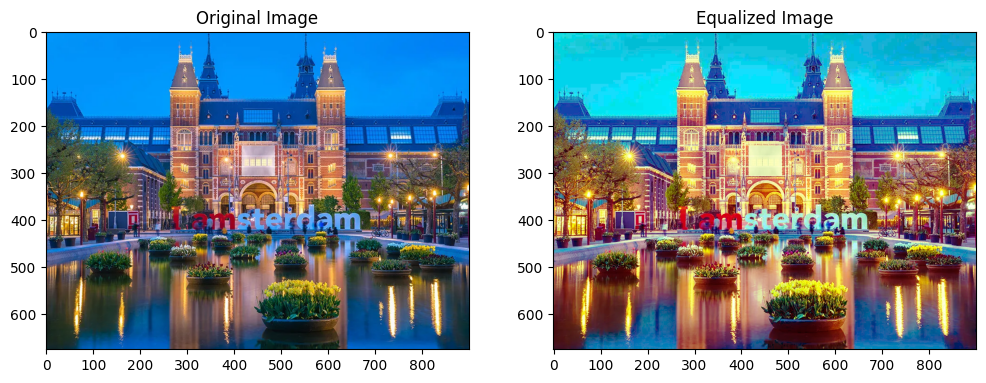

In [ ]:
image = cv2.imread('se.png')

b, g, r = cv2.split(image)

b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

equalized_image = cv2.merge([b_eq, g_eq, r_eq])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))

plt.show()

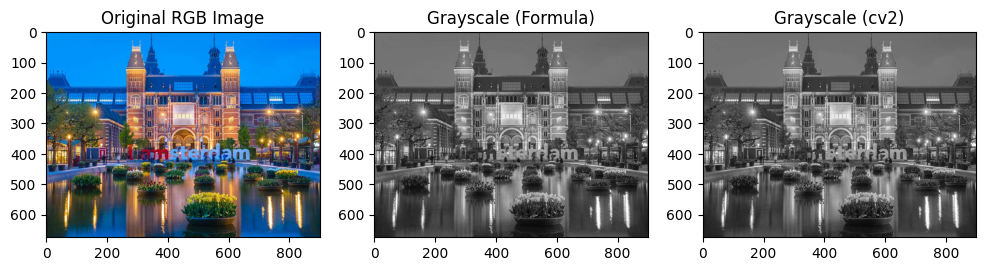

Percentage Difference: 0.19%


In [ ]:
rgb_image = cv2.imread('se.png')

gray_image_formula = (
    0.299 * rgb_image[:, :, 2] +  # Red channel
    0.587 * rgb_image[:, :, 1] +  # Green channel
    0.114 * rgb_image[:, :, 0]    # Blue channel
).astype(np.uint8)

# Method 2: Using OpenCV's cvtColor function
gray_image_cv2 = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original RGB Image')
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Grayscale (Formula)')
plt.imshow(gray_image_formula, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Grayscale (cv2)')
plt.imshow(gray_image_cv2, cmap='gray')

plt.show()

# Compare the two grayscale images
difference = np.abs(gray_image_formula.astype(int) - gray_image_cv2.astype(int))
difference_percentage = np.mean(difference) / 255.0 * 100.0
print(f"Percentage Difference: {difference_percentage:.2f}%")

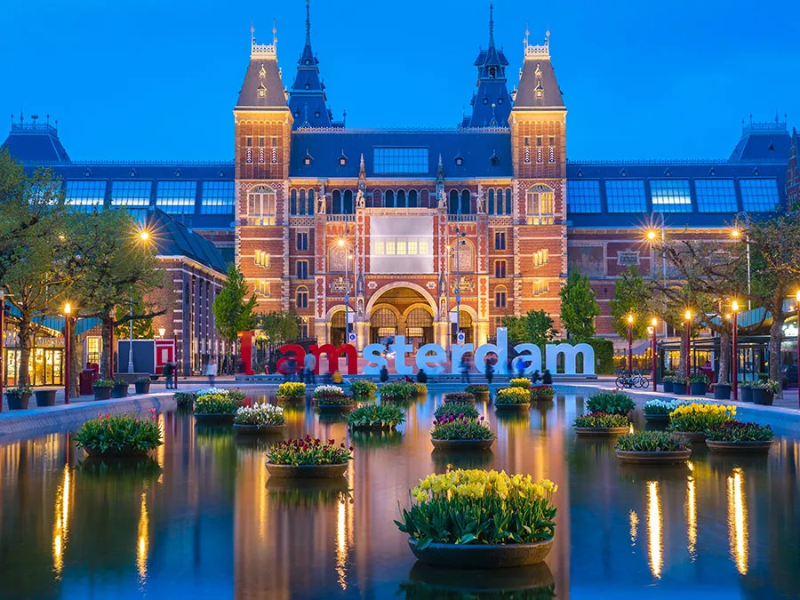

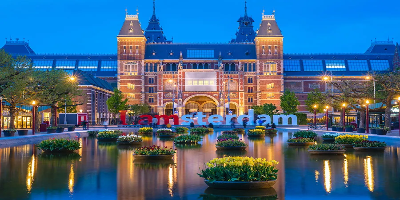

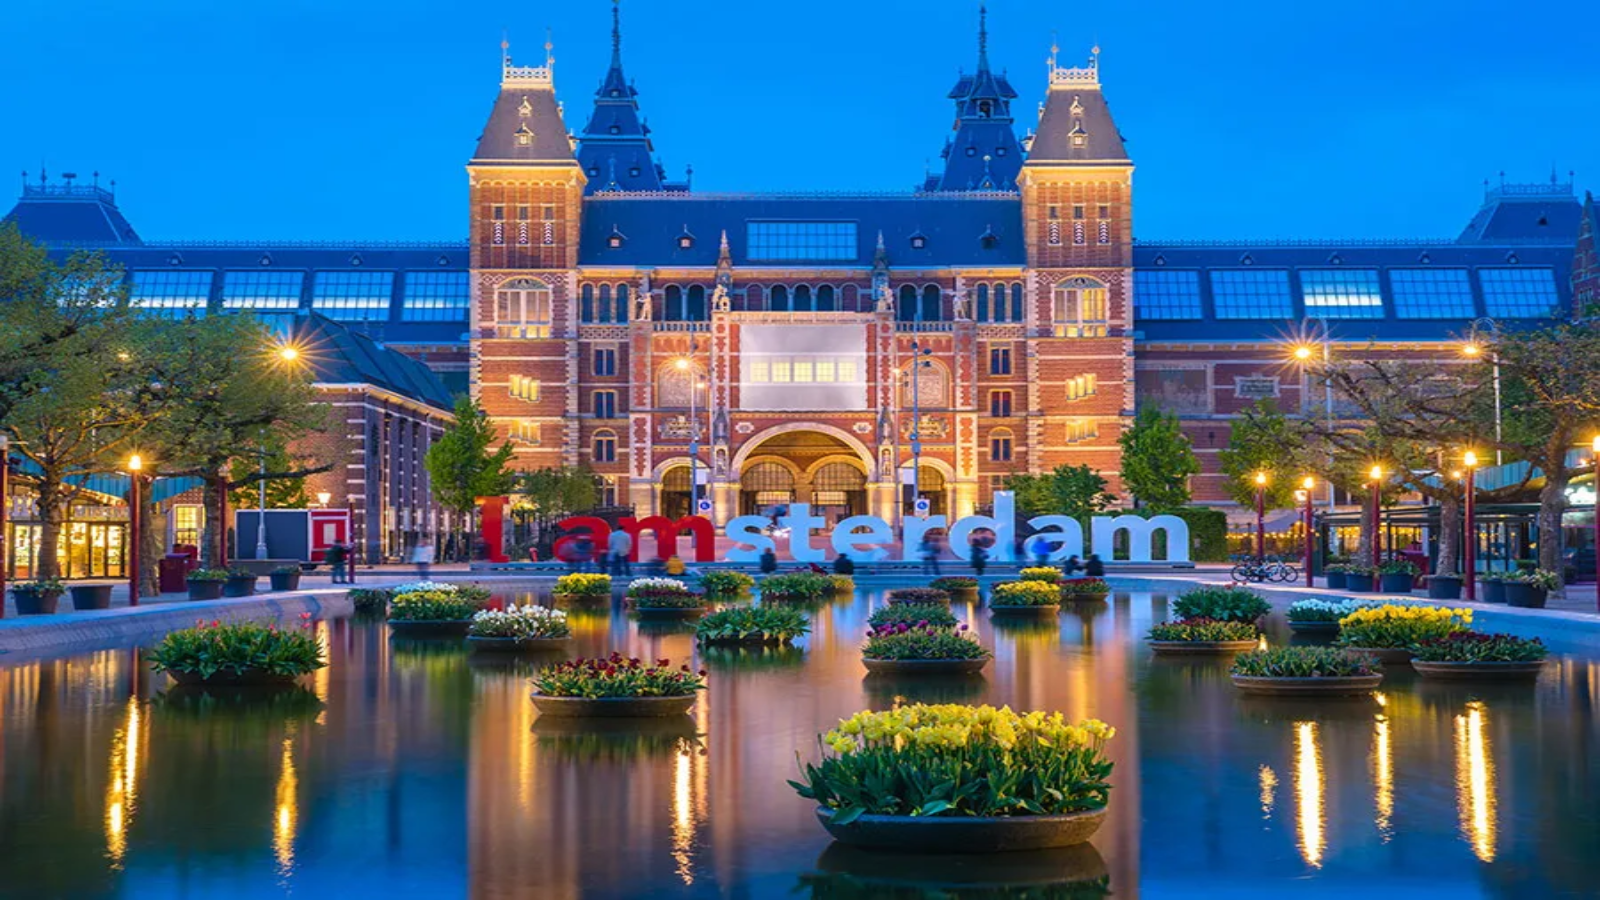

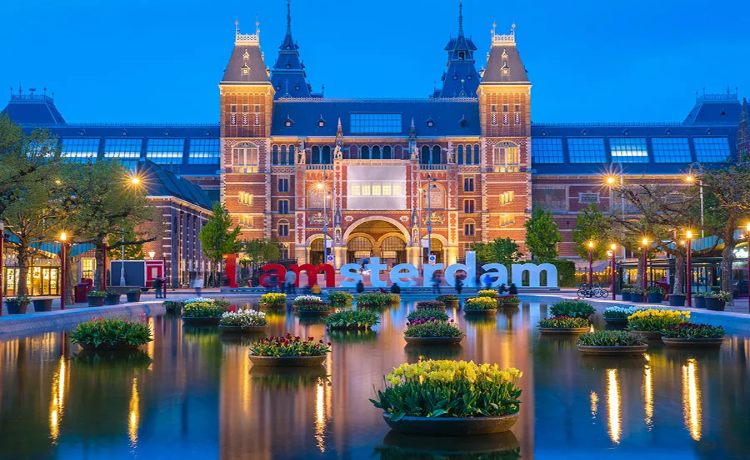

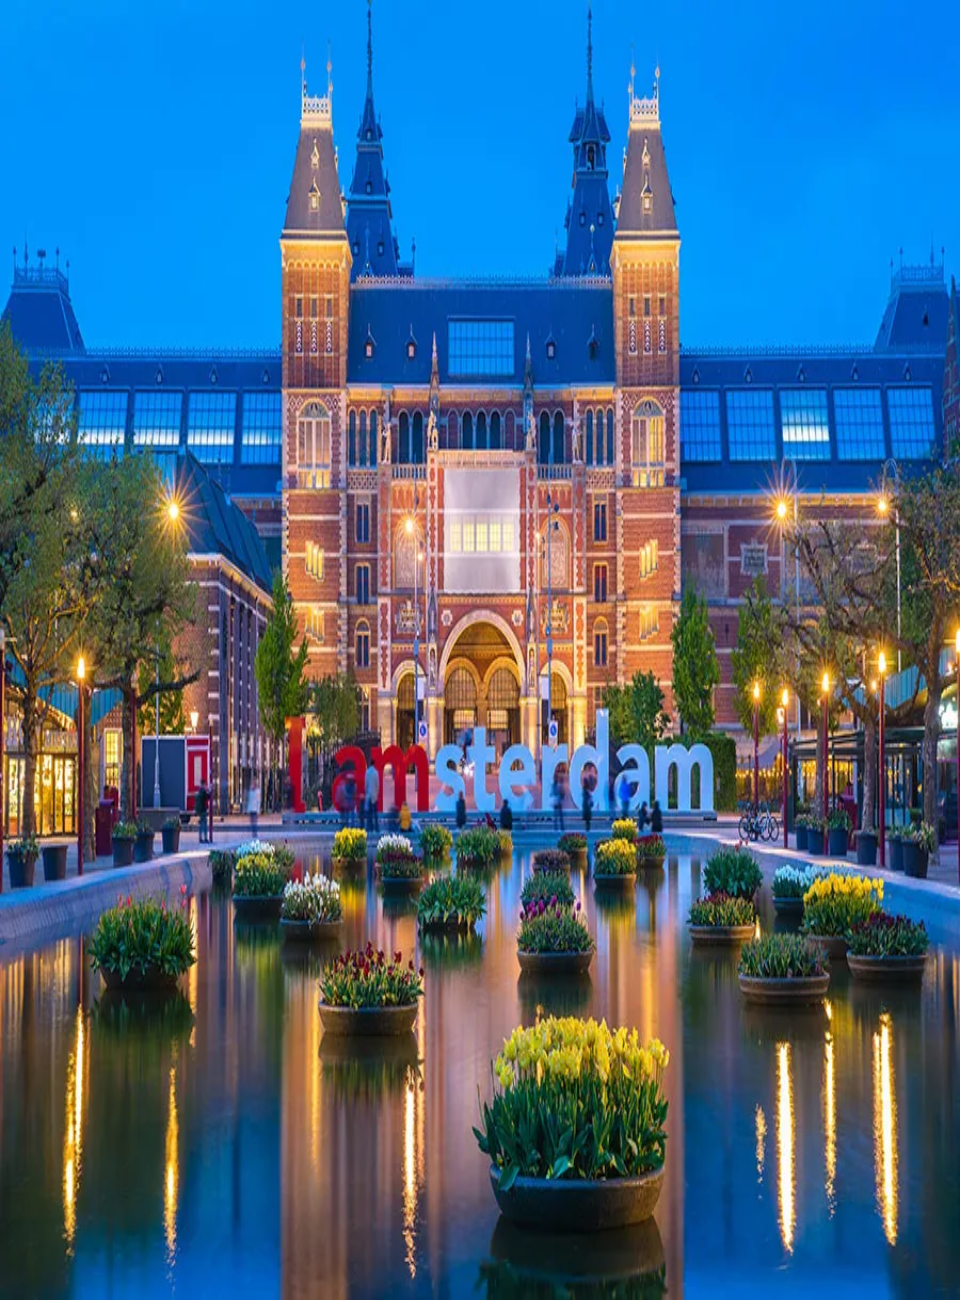

In [ ]:
# Q - 3

original_image = cv2.imread('se.png')
current_height, current_width, _ = original_image.shape

desired_resolutions = [(800, 600), (400, 200), (1600, 900), (750, 460), (960, 1300)]

for new_width, new_height in desired_resolutions:
    x_scale = new_width / current_width
    y_scale = new_height / current_height

    resized_image = cv2.resize(original_image, (new_width, new_height))
    cv2_imshow(resized_image)

Resultant Pixel Value: 114.0


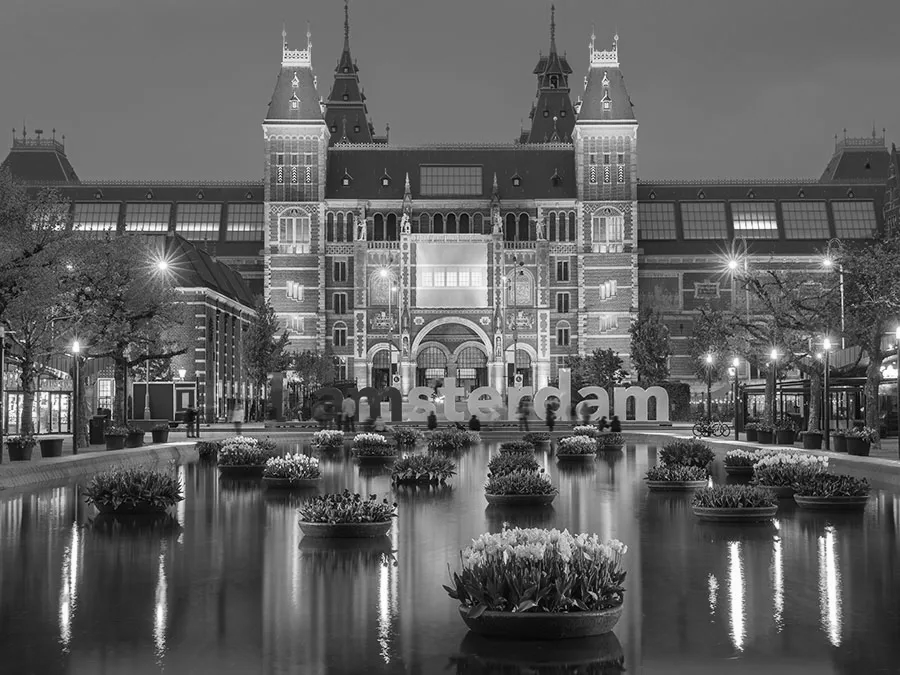

In [ ]:
# Q - 4
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.float32) / 9.0

image = cv2.imread('se.png', cv2.IMREAD_GRAYSCALE)

image_height, image_width = image.shape
kernel_height, kernel_width = kernel.shape

top_left_x = 50
top_left_y = 50
bottom_right_x = top_left_x + kernel_width
bottom_right_y = top_left_y + kernel_height

dummy_region = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

resultant_pixel = np.sum(dummy_region * kernel)

print("Resultant Pixel Value:", resultant_pixel)

cv2_imshow(image)
cv2_imshow(dummy_region)

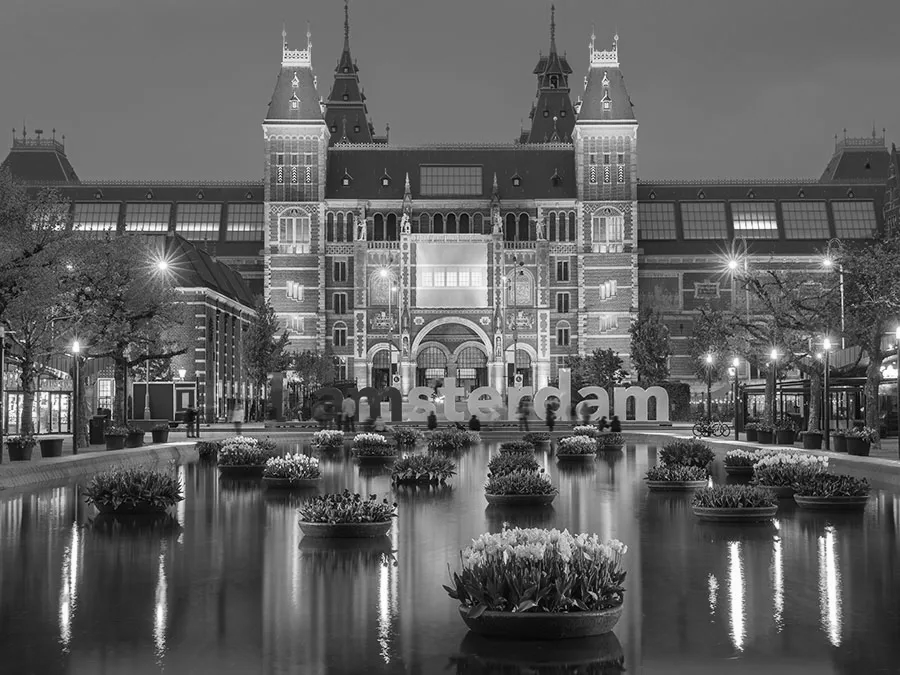

In [ ]:
# Q - 5

image = cv2.imread('se.png', cv2.IMREAD_GRAYSCALE)
dummy = cv2.imread('df.JPG', cv2.IMREAD_GRAYSCALE)

if image is not None and dummy is not None:
    image_normalized = image.astype(np.float32) / 255.0
    dummy_normalized = dummy.astype(np.float32) / 255.0

    correlation_result = cv2.matchTemplate(image_normalized, dummy_normalized, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(correlation_result)

    top_left = max_loc
    dummy_height, dummy_width = dummy.shape[:2]
    bottom_right = (top_left[0] + dummy_width, top_left[1] + dummy_height)

    image_with_match = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(image_with_match, top_left, bottom_right, (0, 255, 0), 2)

    cv2_imshow(image)
    cv2_imshow(dummy)
    cv2_imshow(image_with_match)
else:
    print("Error: Could not load one or both of the images.")

cv2.waitKey(0)
cv2.destroyAllWindows()